In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras.losses import MeanSquaredError,MeanAbsoluteError,huber
import warnings 
warnings.filterwarnings('ignore')

**Data Prepration**

In [2]:
df = pd.read_csv('train.csv')
df.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [3]:
df.shape

(1000, 12)

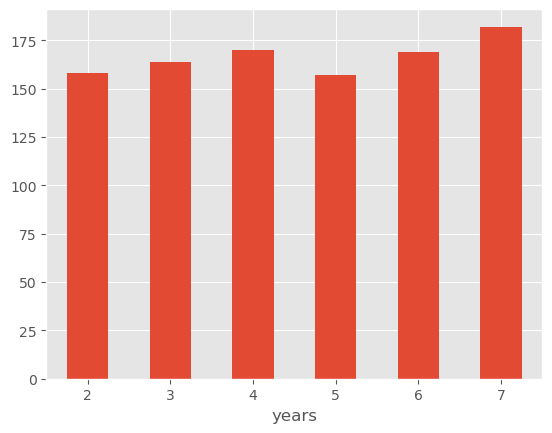

In [4]:
plt.style.use('ggplot')
x = df['years'].value_counts().sort_index(ascending=True)
x.plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

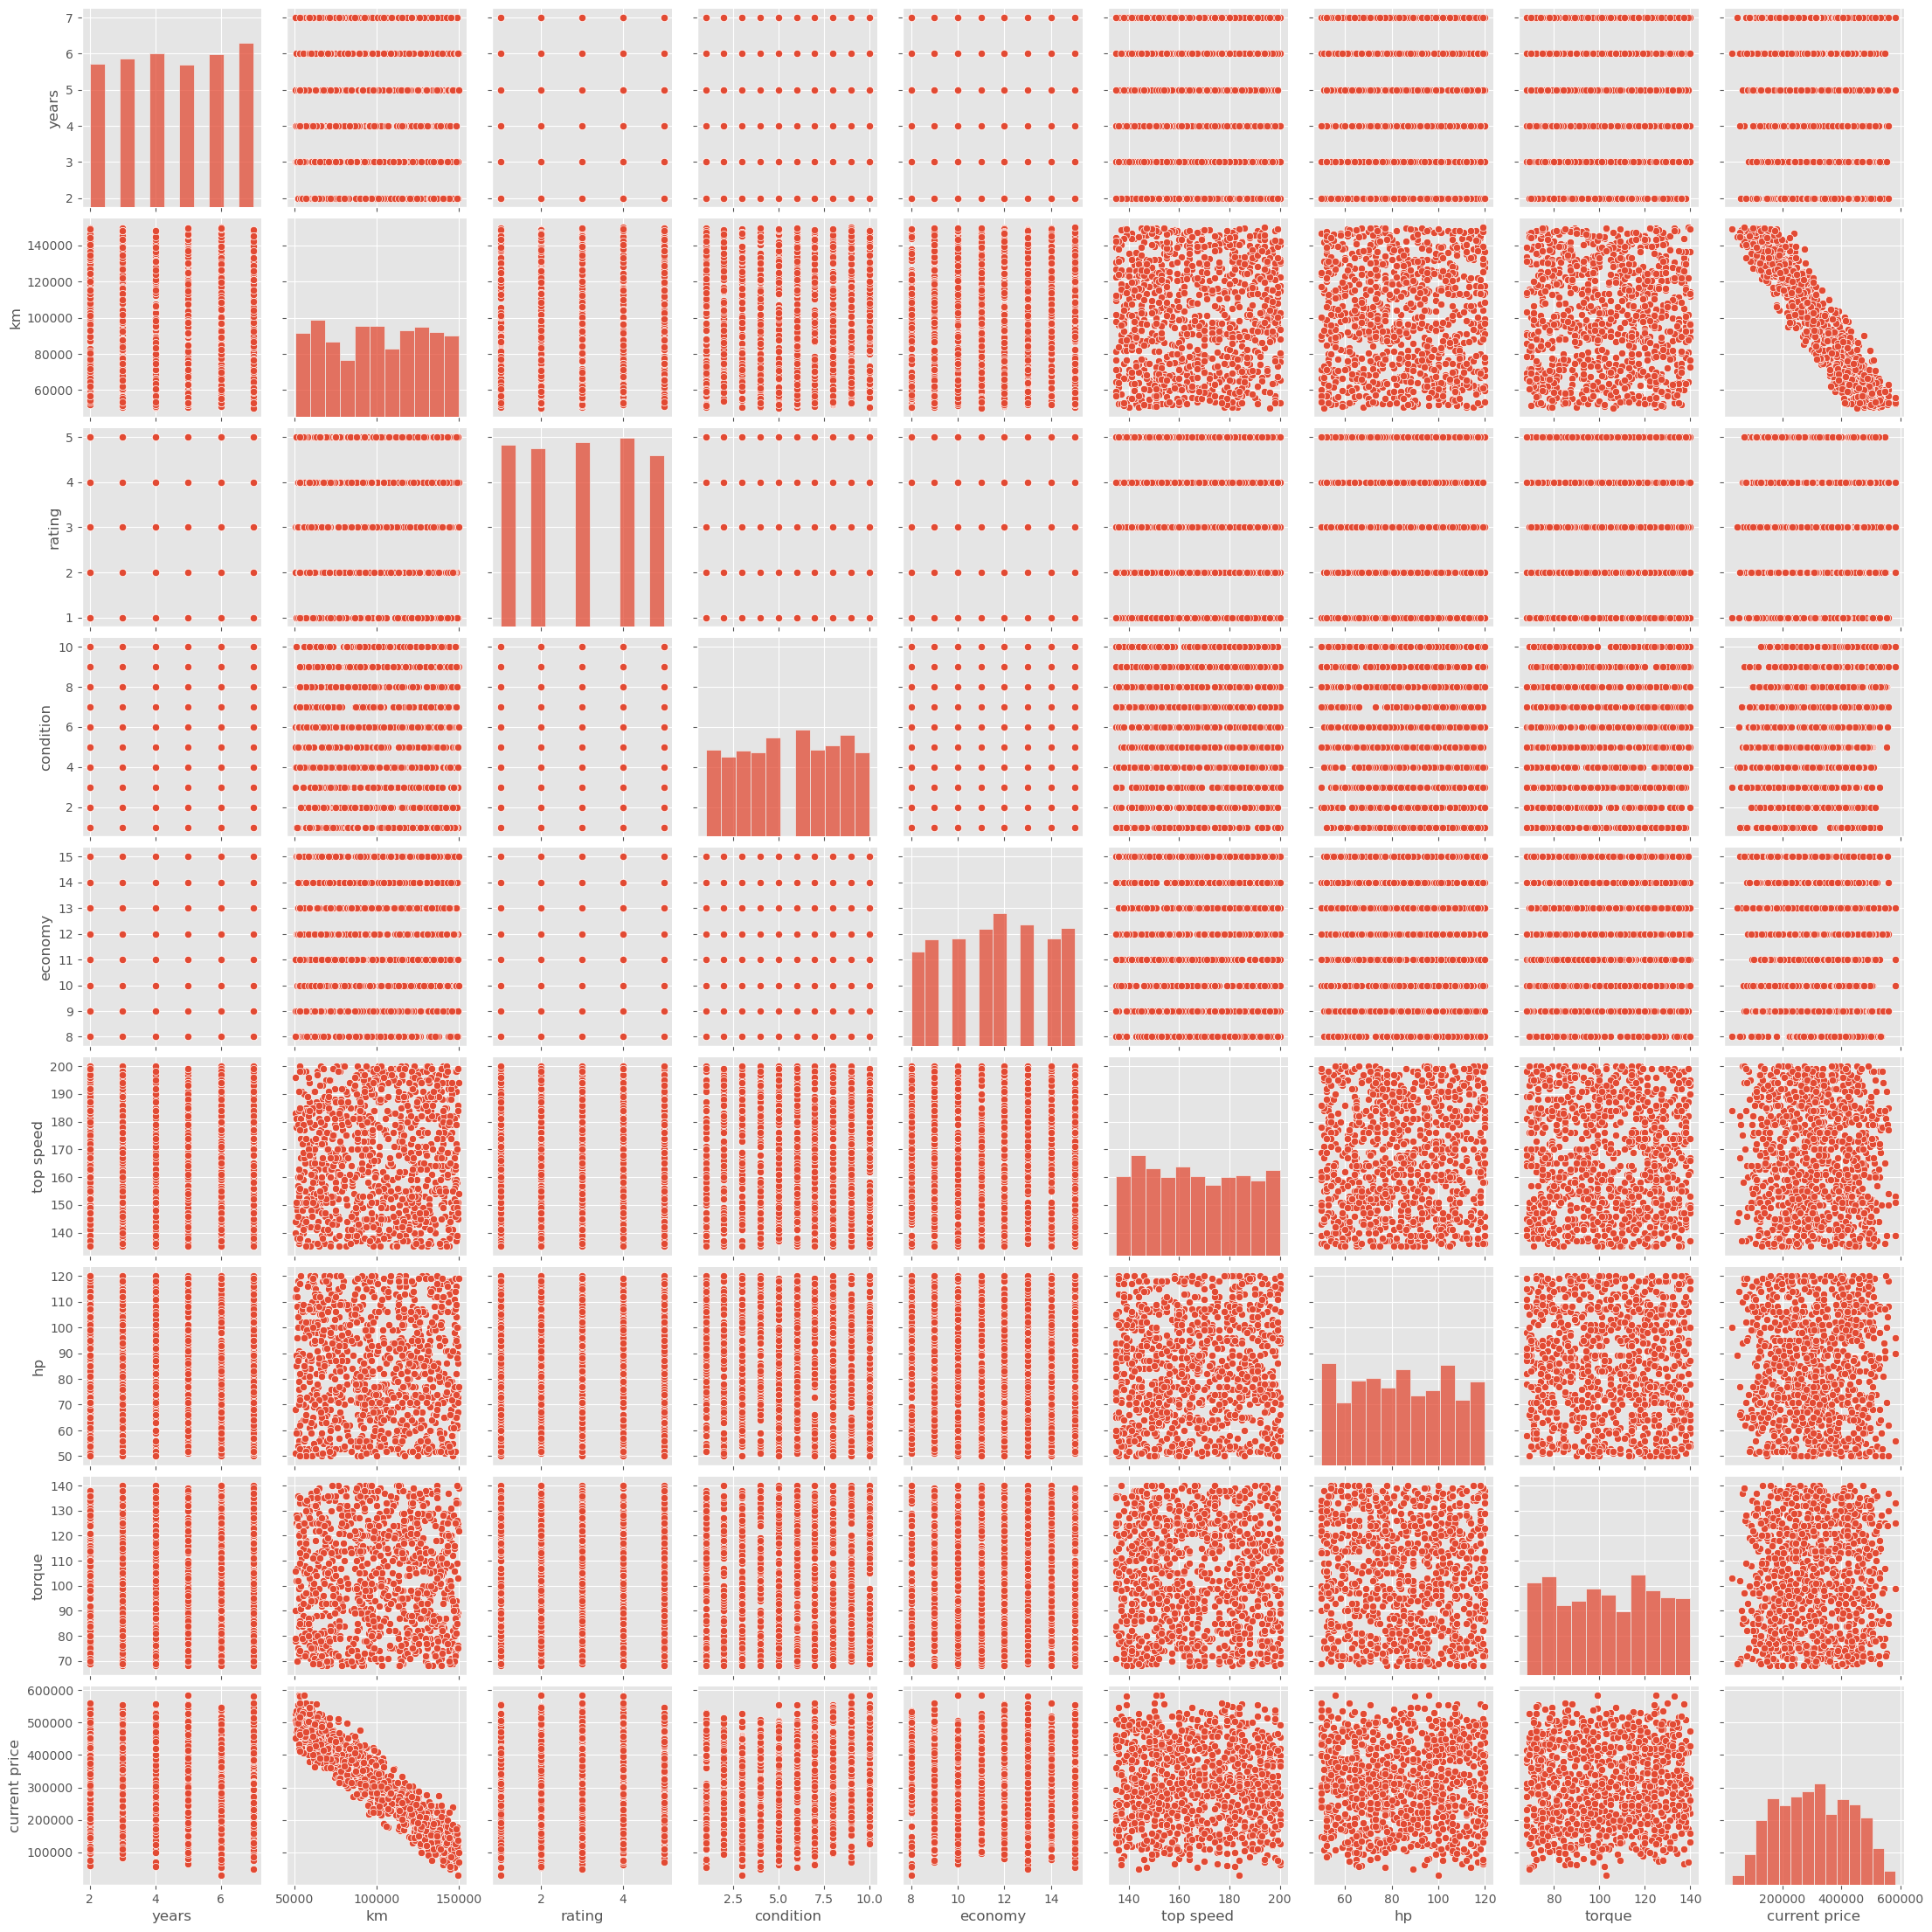

In [5]:
sns.pairplot(df[['years', 'km', 'rating','condition', 'economy', 'top speed', 'hp', 'torque', 'current price']])

In [6]:
tensor_data = tf.compat.v1.constant(df)
tensor_data = tf.compat.v1.cast(df,tf.float32)
print(tensor_data)

tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [9.980000e+02 6.463440e+05 8.427330e+05 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [9.990000e+02 5.355590e+05 7.324390e+05 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [1.000000e+03 5.901050e+05 7.797430e+05 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 12), dtype=float32)


In [7]:
tensor_data = tf.random.shuffle(df)
print(tensor_data[:5])

tf.Tensor(
[[8.400000e+02 5.101410e+05 7.383800e+05 3.000000e+00 1.009660e+05
  1.000000e+00 5.000000e+00 1.100000e+01 1.570000e+02 9.300000e+01
  8.000000e+01 2.220635e+05]
 [4.220000e+02 5.430300e+05 7.937680e+05 4.000000e+00 9.282300e+04
  5.000000e+00 9.000000e+00 1.500000e+01 1.890000e+02 1.190000e+02
  9.100000e+01 3.279940e+05]
 [4.280000e+02 6.384620e+05 8.468770e+05 6.000000e+00 1.198620e+05
  4.000000e+00 9.000000e+00 9.000000e+00 1.430000e+02 8.900000e+01
  8.800000e+01 2.895705e+05]
 [1.590000e+02 5.457010e+05 8.510760e+05 7.000000e+00 1.054810e+05
  3.000000e+00 9.000000e+00 8.000000e+00 1.390000e+02 5.300000e+01
  1.020000e+02 2.978860e+05]
 [4.210000e+02 5.522800e+05 8.982900e+05 2.000000e+00 1.298910e+05
  5.000000e+00 2.000000e+00 1.100000e+01 1.440000e+02 5.700000e+01
  7.200000e+01 2.074805e+05]], shape=(5, 12), dtype=float64)


In [8]:
X = tensor_data[:,3:-1]
print(x.shape[:5])

(6,)


In [9]:
y = tensor_data[:,-1]
y = tf.expand_dims(y,axis=-1)
print(y[:5])

tf.Tensor(
[[222063.5]
 [327994. ]
 [289570.5]
 [297886. ]
 [207480.5]], shape=(5, 1), dtype=float64)


In [10]:
normalize = tf.keras.layers.Normalization(mean=5,variance=4)
x = tf.compat.v1.constant([[4,3,2,9,5],
                          [3,6,4,8,7]])
normalize(x)

<tf.Tensor: shape=(2, 5), dtype=float32, numpy=
array([[-0.5, -1. , -1.5,  2. ,  0. ],
       [-1. ,  0.5, -0.5,  1.5,  1. ]], dtype=float32)>

In [11]:
normalize = tf.keras.layers.Normalization()
normalize.adapt(X)
normalize(X)[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[-0.9084984 ,  0.02373657, -1.4178835 , -0.20970328, -0.28034112,
        -0.5131564 ,  0.41225642, -1.1128278 ],
       [-0.32650065, -0.25574696,  1.435001  ,  1.2072108 ,  1.5138366 ,
         1.1467037 ,  1.680136  , -0.5902174 ],
       [ 0.8374948 ,  0.6722838 ,  0.7217798 ,  1.2072108 , -1.17743   ,
        -1.2393453 ,  0.21719801, -0.7327475 ],
       [ 1.4194925 ,  0.1787001 ,  0.00855871,  1.2072108 , -1.6259744 ,
        -1.4468278 , -1.5383276 , -0.06760698],
       [-1.4904962 ,  1.0164986 ,  1.435001  , -1.2723888 , -0.28034112,
        -1.1874746 , -1.3432691 , -1.4929081 ]], dtype=float32)>

In [12]:
model = tf.keras.Sequential([
                              tf.keras.layers.InputLayer(input_shape=(8,)),
                               normalize,
                               tf.keras.layers.Dense(1)])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normaliza  (None, 8)                 17        
 tion)                                                           
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 26 (108.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 17 (72.00 Byte)
_________________________________________________________________


In [13]:
model = tf.keras.Sequential()
model.add(normalize)
model.add(keras.layers.Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normaliza  (None, 8)                 17        
 tion)                                                           
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 26 (108.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 17 (72.00 Byte)
_________________________________________________________________


**Losses And Model Compile**

In [16]:
model.compile(loss=MeanAbsoluteError())